In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

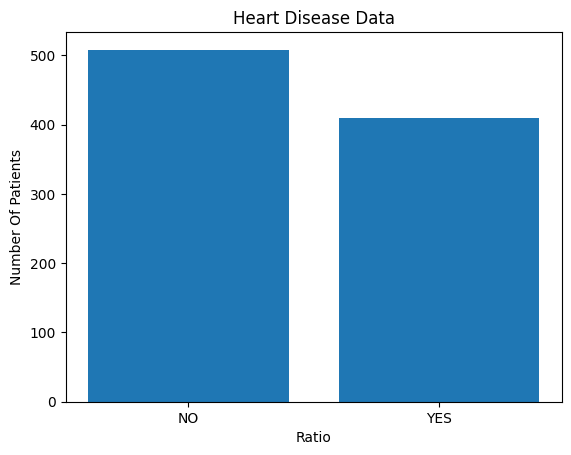

In [ ]:
import matplotlib.pyplot as plt

x , y = df['HeartDisease'].value_counts()

categories = ["NO","YES"]
values = [x,y]

plt.bar(categories, values)


plt.xlabel('Ratio')
plt.ylabel('Number Of Patients')
plt.title('Heart Disease Data')

# Show the plot
plt.show()

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         5
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             2
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### **Remove Catagorical Values**

In [ ]:
columns_to_drop = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina', 'ST_Slope']  # List of columns to be dropped
df = df.drop(columns=columns_to_drop)

### **Remove Null Values**

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64

# **Train Test Split**

In [ ]:
# Splitting the dataset into training and testing sets
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [ ]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
687,70,156.0,245,0,143.0,0.0
533,63,110.0,252,0,140.0,2.0
90,49,110.0,208,0,160.0,0.0
540,62,138.0,204,0,122.0,1.2
80,55,110.0,277,0,160.0,0.0
...,...,...,...,...,...,...
842,43,132.0,341,1,136.0,3.0
198,53,120.0,246,0,116.0,0.0
636,48,130.0,245,0,180.0,0.2
566,41,150.0,171,0,128.0,1.5


### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Print accuracy and confusion matrix
print("Accuracy: {:.2f}%".format(accuracy1 * 100))
print("Confusion Matrix:\n", confusion_mat)

F1 accuracy:69.61%
Accuracy: 66.12%
Confusion Matrix:
 [[50 33]
 [29 71]]


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy2 * 100))

F1 accuracy:68.69%
Accuracy: 66.12%


### **SVM**

In [ ]:
from sklearn.svm import SVC
clf = SVC()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy3 * 100))

F1 accuracy:71.29%
Accuracy: 68.31%


### **Logistic Regression**

In [ ]:
# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Print accuracy and confusion matrix
print("Accuracy: {:.2f}%".format(accuracy4 * 100))
print("Confusion Matrix:\n", confusion_mat)


F1 accuracy:80.40%
Accuracy: 78.69%
Confusion Matrix:
 [[64 19]
 [20 80]]


In [ ]:
# File path to save the CSV file
df.to_csv("example.csv", index = False )



### **Bar Chart Plot**

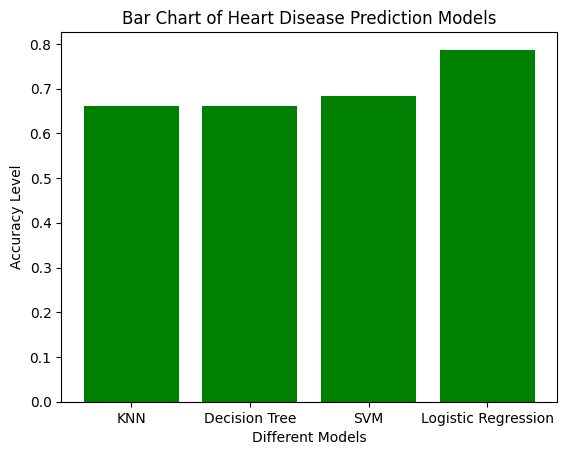

In [ ]:
import matplotlib.pyplot as plt

x_axis = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
y_axis = [accuracy1, accuracy2, accuracy3, accuracy4]

plt.bar(x_axis, y_axis,color= 'green')
plt.title('Bar Chart of Heart Disease Prediction Models')
plt.xlabel('Different Models')
plt.ylabel('Accuracy Level')
plt.show()